<a href="https://colab.research.google.com/github/arfaluvess/bank_data/blob/main/Bank_marketing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get data to be still formated and readable
from google.colab import data_table
data_table.enable_dataframe_formatter()

# # Disable data frame formatter
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

# Objective 

* Did EDA 
* Practice a machine learning program 
* How many rows and columns does the dataset contain?
* Are there any NaN values present?
* Are there any duplicate rows?
* What are the data types of the columns?

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize'] = (15,12)

# Read bank data
df = pd.read_csv('/content/drive/MyDrive/Project_Arfa_DS/bank_marketing_train.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32946,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
32947,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
32948,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
32949,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Size
df.shape

(32951, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# Display head of data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32173,54,unknown,married,basic.9y,no,yes,no,cellular,jul,tue,...,2,13,2,success,-1.7,94.215,-40.3,0.876,4991.6,no
28327,35,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
29892,59,admin.,divorced,professional.course,no,no,no,cellular,aug,tue,...,1,999,1,failure,-2.9,92.201,-31.4,0.883,5076.2,yes
30369,40,admin.,divorced,high.school,no,yes,no,telephone,sep,fri,...,1,999,0,nonexistent,-3.4,92.379,-29.8,0.803,5017.5,no
7761,46,admin.,married,high.school,unknown,yes,no,telephone,jun,mon,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32951 non-null  int64  
 1   job             32951 non-null  object 
 2   marital         32951 non-null  object 
 3   education       32951 non-null  object 
 4   default         32951 non-null  object 
 5   housing         32951 non-null  object 
 6   loan            32951 non-null  object 
 7   contact         32951 non-null  object 
 8   month           32951 non-null  object 
 9   day_of_week     32951 non-null  object 
 10  duration        32951 non-null  int64  
 11  campaign        32951 non-null  int64  
 12  pdays           32951 non-null  int64  
 13  previous        32951 non-null  int64  
 14  poutcome        32951 non-null  object 
 15  emp.var.rate    32951 non-null  float64
 16  cons.price.idx  32951 non-null  float64
 17  cons.conf.idx   32951 non-null 

# Descriptive analysis

* Define which columns have int/float and string datatype
* Rename y to term_deposit
* What is most frequent customer with marital status
* Check the target column that have categorical samples 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,40.000941,258.854299,2.558314,962.537131,0.172620,0.084820,93.575129,-40.491921,3.624562,5167.147431
std,10.410233,259.167585,2.732370,186.757655,0.493482,1.570037,0.578020,4.629348,1.734087,72.197238
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Check the categorical and numerical columns
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(include=object)

In [10]:
num_col.sample(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
19889,53,76,1,999,0,-0.1,93.200,-42.0,4.153,5195.8
6568,35,409,1,999,0,1.4,94.465,-41.8,4.864,5228.1
32895,34,162,2,999,2,-1.1,94.767,-50.8,1.046,4963.6
24742,29,90,1,999,1,-1.8,92.893,-46.2,1.344,5099.1
17467,36,76,1,999,0,1.4,93.444,-36.1,4.964,5228.1


In [11]:
cat_col.sample(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
20744,admin.,married,university.degree,no,yes,yes,cellular,nov,wed,nonexistent,no
6740,admin.,single,university.degree,unknown,yes,no,telephone,jun,tue,nonexistent,no
30851,technician,married,high.school,no,no,yes,cellular,oct,thu,nonexistent,yes
10719,blue-collar,single,basic.9y,unknown,yes,no,telephone,jul,wed,nonexistent,no
13499,services,married,high.school,unknown,yes,yes,cellular,jul,thu,nonexistent,no


In [12]:
# Rename column of y to term_deposit
df = df.rename(columns={'y':'term_deposit'})

In [13]:
column_names = ['age','education','housing', 'campaign','pdays']

# loop through the column names
for column_name in column_names:
    print(f"Unique values in column '{column_name}': {np.sort(df[column_name].unique())} {df[column_name].nunique()} unique values)")

Unique values in column 'age': [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89
 91 92 94 95 98] 77 unique values)
Unique values in column 'education': ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown'] 8 unique values)
Unique values in column 'housing': ['no' 'unknown' 'yes'] 3 unique values)
Unique values in column 'campaign': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 39 40 42 43 56] 41 unique values)
Unique values in column 'pdays': [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  21  22  25  26  27 999] 26 unique values)


In [14]:
print(f'In the target column, it is observed: \n {df["term_deposit"].value_counts()}')

In the target column, it is observed: 
 no     29239
yes     3712
Name: term_deposit, dtype: int64


 # Let's did some visualization

* Aim to : <br>
 a) Helps to understand the data, <br>
 b) Identify patterns and outliers, <br>
 c) Communicate findings, and inform further steps. 

* Do age affect the acceptance rate on the marketing promotions
* Do education really affect the increasing of acceptance

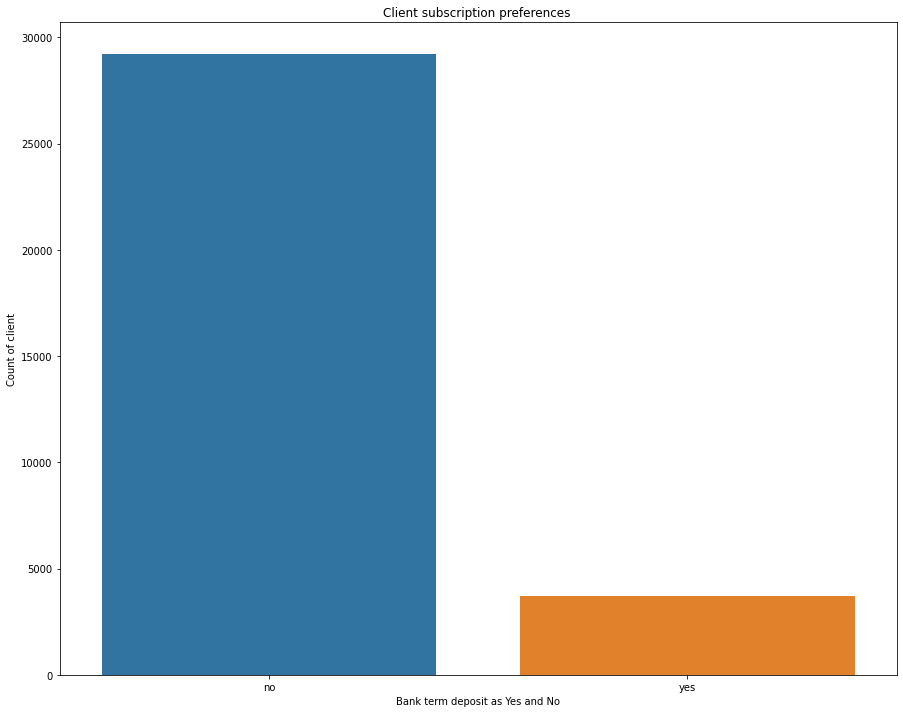

In [15]:
# Let visualize the target/label columns
ax = sns.countplot(data=df, 
                   x='term_deposit')
ax.set(xlabel='Bank term deposit as Yes and No',
       ylabel='Count of client',
       title='Client subscription preferences ')
plt.show()

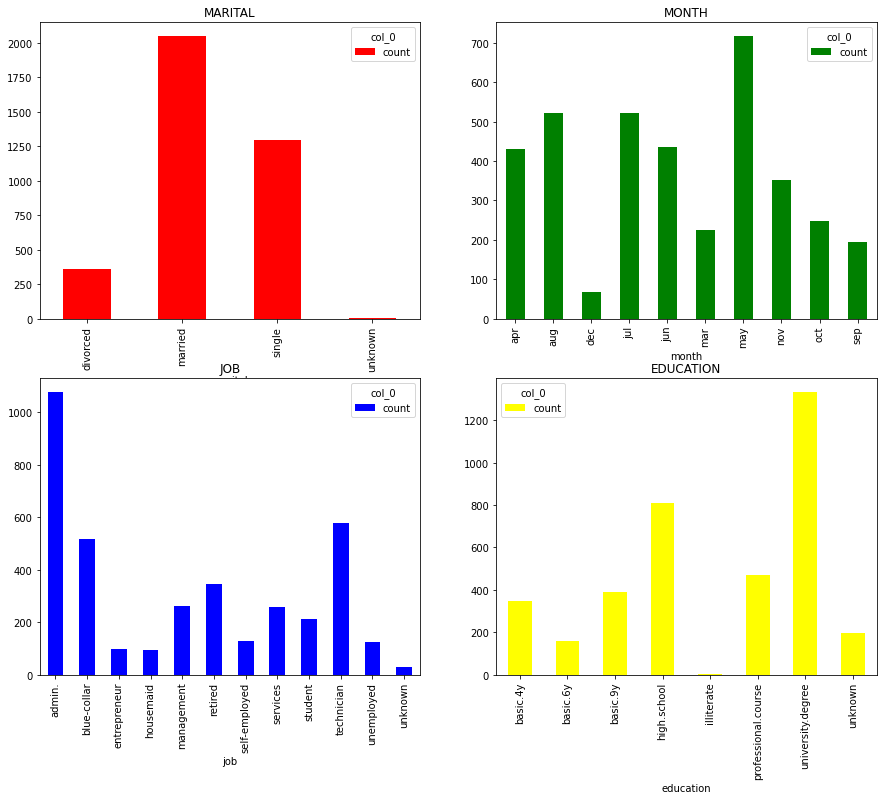

In [16]:
bank_yes = df[df['term_deposit'] == 'yes']

# Columns of interest
columns = ['marital', 'month', 'job', 'education']
colors = ['red', 'green', 'blue', 'yellow']

# Create subplot
fig, axes = plt.subplots(nrows=2, ncols=2)

# Iterate through columns
for i, col in enumerate(columns):
    # Create crosstab
    ct = pd.crosstab(index=bank_yes[col], columns='count')
    # Plot crosstab as bar plot on subplot
    ct.plot.bar(ax=axes[i // 2, i % 2], color=colors[i]) 
    # Set title
    axes[i // 2, i % 2].set_title(col.upper())

In [17]:
# Describe the campaign based on the month data collected 
import plotly.express as px
fig = px.box(df,
             x='marital', y='age', 
             color='marital',
             title='Distribution of age based on marital status',
             color_discrete_sequence=['blue', 'red', 'yellow', 'grey'])
fig.show()




# Find the missing values 



In [18]:
# Check each element of data type 
df.applymap(type)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit
0,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
1,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
2,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
3,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
4,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32946,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
32947,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
32948,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
32949,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'int'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>


In [19]:
# Find missing values - affect performance of the model to produce accuarte result

# df.isna().sum()
print(f'Any NaN values among the data?\n {df.isna().values.any()}')

Any NaN values among the data?
 False


# Let's did some Machine learning 
* TO LEARN, GAIN KNOWLEDGES

## Steps in ML

1. Get the data
2. Data preprocessing/ Data cleansing
3. Visualize the data
4. Split the data into features (X) and target (Y)
5. Splitting the dataset (X and Y) into training and test set based 80 - 20 rules
6. Select machine learning model
7. Train the ML model using X_train and y_train and perform training 
8. Test ML model using X_test and predicted output
9. Compare the predicted output with the actual output to find the accuracy 
10. If the accuracy is more than 90%, apply model for live new raw data
11. Perform any update if required.





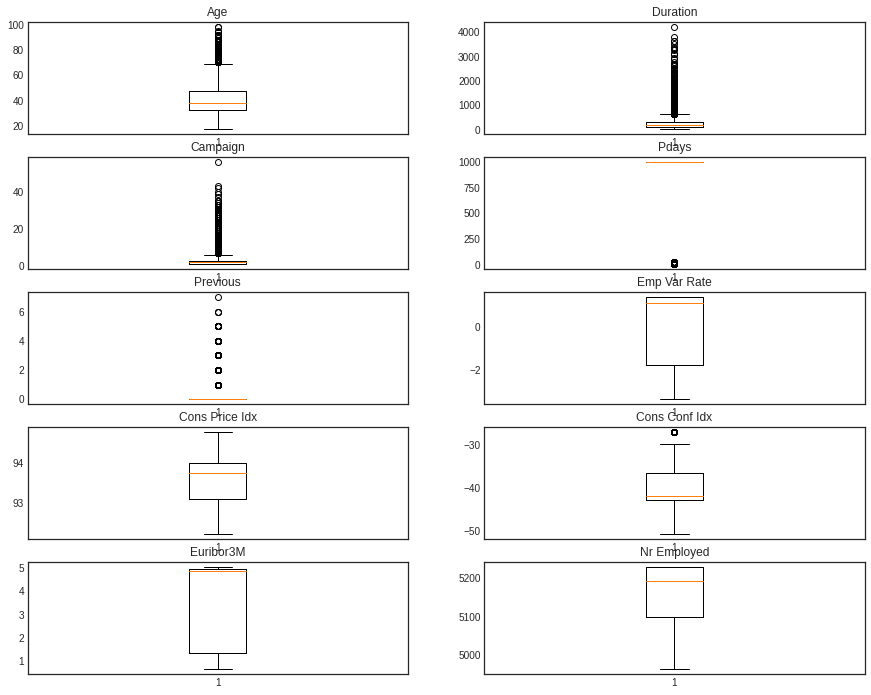

In [20]:
# Handling outliers
plt.style.use('seaborn-white')
columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i, col in enumerate(columns):
    ax = plt.subplot(5, 2, i+1)
    plt.boxplot(df[col])
    ax.set_title(col.replace('.',' ').title())
plt.show()

In [21]:
# Observed that age, duration, campaign have outliers
# 1.5 scaling factor normal limits and common used in outlier detection

num_feature = ['age', 'duration', 'campaign']
for cols in num_feature:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  IQR = Q3 - Q1
  filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 * IQR )
  df = df.loc[filter]

Text(0.5, 1.0, 'campaign')

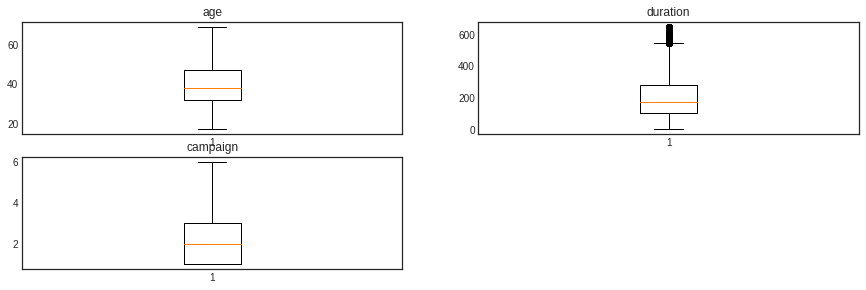

In [22]:
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(df['campaign'])
ax.set_title('campaign')

In [23]:
# Education Encoding
bank_feat = df.copy()
lst = ['basic.9y', 'basic.6y', 'basic.4y']
for i in lst:
  bank_feat.loc[bank_feat['education'] == i, 'education'] = 'middle.school'
bank_feat['education'].value_counts()

middle.school          8564
university.degree      8409
high.school            6618
professional.course    3650
unknown                1182
illiterate               12
Name: education, dtype: int64

In [24]:
# Month and Day of the week Encoding
month_dict = {'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
bank_feat['month'] = bank_feat['month'].map(month_dict)

day_dict={'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6}
bank_feat['day_of_week']= bank_feat['day_of_week'].map(day_dict) 

bank_feat.loc[:, ['month', 'day_of_week']].sample(5)

,month,day_of_week
9860,7,6
23511,4,6
23325,4,6
30922,11,3
10277,7,3


In [25]:
# Encoding 999 as 0
bank_feat['pdays'].replace(999, 0, inplace=True)

bank_feat['pdays'].value_counts()

0     27434
3       281
6       275
4        82
12       45
9        44
2        41
7        37
10       37
5        34
13       23
1        22
11       18
15       14
14       12
8        10
16        8
17        6
18        4
22        3
25        1
26        1
27        1
19        1
21        1
Name: pdays, dtype: int64

In [26]:
# Ordinal Number Encoding for housing, default, loan
dictionary = {'yes':1, 'no':0, 'unknown':-1}
cols_to_recode = ['housing', 'default', 'loan']
for col in cols_to_recode:
  bank_feat[col] = bank_feat[col].map(dictionary)

In [27]:
# Encoding term deposit Yes and No to numerical
dictionary1 = {'yes':1, 'no':0}
bank_feat['term_deposit'] = bank_feat['term_deposit'].map(dictionary1)

In [28]:
bank_feat.loc[:, ['housing', 'default', 'loan', 'term_deposit']].head()

,housing,default,loan,term_deposit
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,-1,0,0


In [29]:
# Ordinal encoding for contact and poutcome
columns_to_dummy = ['contact','poutcome']
for col in columns_to_dummy:
    dummy_cols = pd.get_dummies(bank_feat[col], prefix='dummy',drop_first=True)
    bank_feat = pd.concat([bank_feat,dummy_cols],axis=1)
    bank_feat.drop(col,axis=1, inplace=True)

In [30]:
bank_feat.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [31]:
# Frequency Encoding for category like job and education
cols_of_interest = ['job', 'education']

# Convert to key-value pairs 
value_count_dict = {}
for col in cols_of_interest:
    # Get value counts of column and convert to dictionary
    value_count_dict[col] = bank_feat[col].value_counts().to_dict()
    # Map column values to value counts
    bank_feat[col] = bank_feat[col].map(value_count_dict[col])

In [32]:
bank_feat.loc[:,['job','education']].head()

,job,education
0,706,8564
1,2808,6618
2,2808,6618
3,7243,8564
4,2808,8564


In [33]:
# Target term_deposit by encode the marital feature. 
bank_feat.groupby(['marital'])['term_deposit'].mean()

marital
divorced    0.060237
married     0.069926
single      0.111399
unknown     0.085106
Name: term_deposit, dtype: float64

In [34]:
# Sorted the mean values
ordinal_val = bank_feat.groupby(['marital'])['term_deposit'].mean().sort_values().index

In [35]:
# Changed into key:value pairs
ordinal_labels2={k:i for i,k in enumerate(ordinal_val,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'unknown': 2, 'single': 3}

In [36]:
bank_feat['marital_ordinal']=bank_feat['marital'].map(ordinal_labels2)
bank_feat.drop(['marital'], axis=1,inplace=True)

In [37]:
bank_feat['marital_ordinal'].value_counts()

1    17161
3     8106
0     3121
2       47
Name: marital_ordinal, dtype: int64

### Standardization of numerical variables

1. Typically performed before fitting a model to the data
2. ***Goal of standardization*** is to transform the numeric features of the data so that they have a mean of 0 and a standard deviation of 1
3. **StandardScaler** - preprocessing tool that can be used to standardize data prior to fitting a model


In [38]:
from sklearn.preprocessing import StandardScaler

bank_scale=bank_feat.copy()
categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','term_deposit', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [39]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','term_deposit', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
        pd.DataFrame(scaler.transform(bank_scale[feature_scale]), 
                     columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,term_deposit,dummy_telephone,dummy_nonexistent,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,706,8564,0,0,0,5,2,0,1,1,...,1.698071,0.386409,-0.812146,-0.160851,-0.35424,0.65862,0.741909,0.890105,0.71866,0.33798
1,2808,6618,-1,0,0,5,2,0,1,1,...,1.801511,-0.412961,-0.812146,-0.160851,-0.35424,0.65862,0.741909,0.890105,0.71866,0.33798
2,2808,6618,0,1,0,5,2,0,1,1,...,-0.267297,0.136606,-0.812146,-0.160851,-0.35424,0.65862,0.741909,0.890105,0.71866,0.33798
3,7243,8564,0,0,0,5,2,0,1,1,...,0.043024,-0.398686,-0.812146,-0.160851,-0.35424,0.65862,0.741909,0.890105,0.71866,0.33798
4,2808,8564,-1,0,0,5,2,0,1,1,...,0.560226,-0.063236,-0.812146,-0.160851,-0.35424,0.65862,0.741909,0.890105,0.71866,0.33798


Feature Selection

* Check for feature significance 
* To make our model perform well

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

X=scaled_data.drop(['term_deposit'],axis=1)
y=scaled_data.term_deposit

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

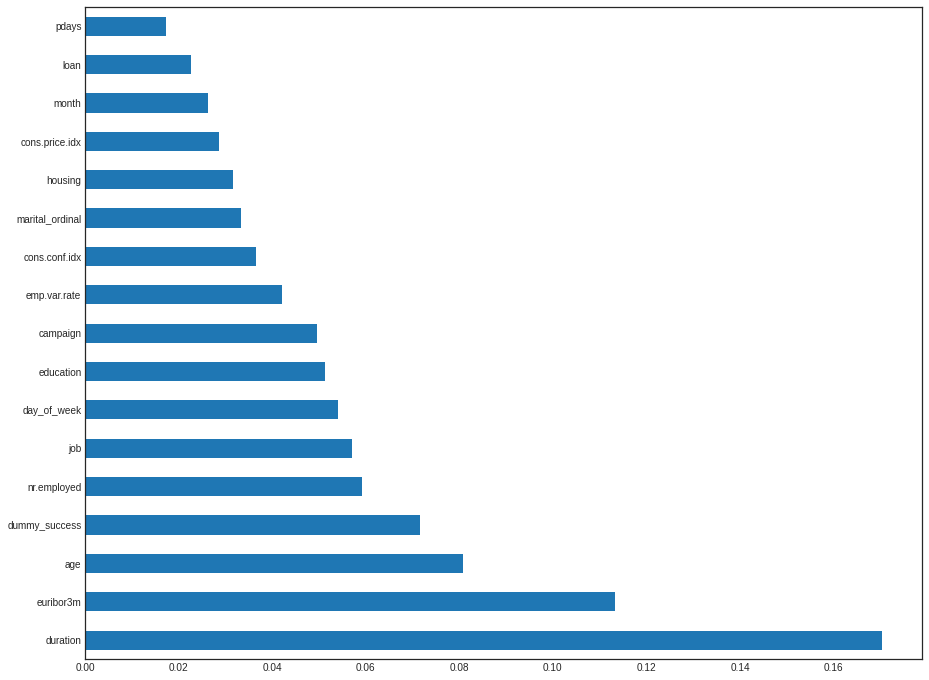

In [41]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

### Train and Test split

* Evaluate the performance of our model on unseen data
* Training the model on a set of data and then evaluating its performance on a different set of data

In [45]:
# Split data into training and test data
from sklearn.model_selection import train_test_split

# Drop the unwanted columns
X = scaled_data.drop(['pdays', 'month', 'cons.price.idx', 'loan', 'housing', 'emp.var.rate', 'term_deposit'], axis=1)
y = scaled_data.term_deposit

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("The Input Training:",X_train.shape)
print("The Input Test:",X_test.shape)
print("The Output Training:",y_train.shape)
print("The Output Test:",y_test.shape)

The Input Training: (22748, 15)
The Input Test: (5687, 15)
The Output Training: (22748,)
The Output Test: (5687,)


# Modelling our data

* What could be the best algorithm for prediction
* Creating cross validation and check all the model accuracy at once

Model Selection

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

Logistic Regression Test Accuracy: 0.8748636941326513
Decision Tree Test Accuracy: 0.6402964964902569
KNN Test Accuracy: 0.8771860141596826
SVC Test Accuracy: 0.9192896363016623
Naive Bayes Test Accuracy: 0.8175987682629579


Logistic regression with Hyperparameter tuning


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

LogisticRegression(C=2.559547922699533, random_state=0)
The mean accuracy of the model is: 0.934763495691929


We have got the best parameters for the model and the mean accuracy is 93.4%

In [49]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[5167   99]
 [ 272  149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      5266
           1       0.60      0.35      0.45       421

    accuracy                           0.93      5687
   macro avg       0.78      0.67      0.71      5687
weighted avg       0.92      0.93      0.93      5687



* The confusion matrix result telling us that we have 5167 + 149 correct predictions and 272 + 99 incorrect predictions.

* The classification report reveals that we have 94% precision which means the accuracy that the model classifier not to label an instance positive that is actually negative which is important as we shouldnt label a lead as positive in making a term deposit when he/she isnt interested in making a deposit. 